# Teorema de Bayes

$$ P(A|B) = \frac{P(B|A) \, P(A)}{P(B)} $$

$$ P(A|B) $$ -> posteriori

$$ P(B|A) $$ -> verosimilitud

$$ P(A) $$ -> priori (probabilidad de la creencia inicial)

$$ P(B) $$ -> evidencia (modifica las probabilidades reales)

La regla de bayes lo que hace es actualizar mi creencia inicial sobre las probabilidades de un evento aleatorio.

https://towardsdatascience.com/probability-concepts-explained-bayesian-inference-for-parameter-estimation-90e8930e5348

https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer

$$ A $$ -> tener cancer

$$ B $$ -> examen positivo

$$ P(A|B) = \frac{P(B|A) \, P(A)}{P(B|A) \, P(A) + P(B|-A) \, P(-A)} $$

Toda esta ecuación surge de expresar P(B) como una probabilidad marginal (la sumatoria de todos los eventos conjuntos respecto a A) y despues aplicar la regla del producto(probabilidad conjunta) a los dos posibles estados de A, es decir, tener o no tener cancer.

Para este ejemplo se asume que:
- La sensitividad del examen es 80%, esto es, dado que tengo cancer, cual es la probabilidad de que el examen sea positivo. Esta es la verosimilitud.
- La probabilidad de tener cancer a modo general en toda la población es de aproximadamente 0.4%. Esta es la probabilidad a priori de tener la enfermedad.
- Los falsos positivos son de este dispositivo lo asumiremos como del 10%, es decir, probabilidad de tener examen positivo pero no tener cancer

Con estos datos ya puedo calcular la probabilidad de tener la enfermedad dado que tengo un resultado positivo, la cual es de 3.1%

Si se realiza un nuevo examen y el resultado es positivo de nuevo, se actualiza el valor de P(A|B) dado que ahora P(A) es de 3.1%. El nuevo valor sería de 20.4%.

## MPA vs MLE

MLE hace parte del area frecuentista.

MPA (Maximun A Posteriori) es el correspondiente del area Bayesiana.

$$ P(h|D) = \frac{P(D|h) \, P(h)}{P(D)} $$

$$ h $$ -> hipótesis

$$ D $$ -> datos

Dado un conjunto conocido de datos D cual es la probabilidad de tener una hipotesis h que describa ese conjunto de datos.

Cuando se trabaja con MLE se busca optimizar la verosimilitud P(D|h). Con MPA se busca optimizar la probabilidad a posteriori P(h|D). Por lo que se obiene parámetros a partir de los datos, en lugar de obtener datos a partir de los parámetros.

$$ \text{max} \, \{ P(h|D) \} $$ -> $$ \text{max} \, \{ P(D|h) \cdot P(h) \} $$

Se desprecia la evidencia porque sin importar el modelo que se usa, la evidencia es la misma. Así tambien se reduce el cálculo de probabilidades a solo 2 cálculos en lugar de 3.

## Naive Bayes

$$ \text{max} \, \{ P(h|D) \} = \text{max} \, \{ P(D|h) \cdot P(h) \} $$

Ahora se calcula cada una de las dos probabilidades para el correspondiente modelo h (rectas, sigmoides, etc).

Hallar la verosimilitud es dificil porque el espacio muestral es muy grande. Si no se asume ninguna simplificación sobre las probabilidades se habla de *Optimal Bayes Classifier*. Con esto se calcularía la probabilidad de la verosimilitud de la forma más exacta posible, pero eso no es viable con grandes cantidades de datos.

Ahora, si asumimos que 

$$ P(D|h) = P([x_1, x_2, ..., x_n] | h) = P(x_1|h) \cdot P(x_2|h) \cdot ... \cdot P(x_n|h) $$

este cálculo es más sencillo, y se llama *Naive Bayes*

https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer

Consideremos un conjunto de datos artificial sobre el cual podamos probar un clasificador de Naive Bayes:

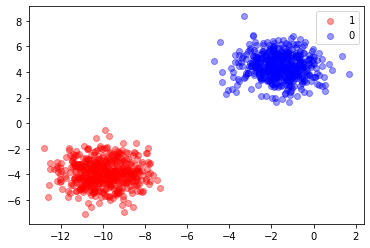

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1)

plt.scatter(X[y==1][:,0], X[y==1][:,1], label = '1', color='red', alpha=0.4)
plt.scatter(X[y==0][:,0], X[y==0][:,1], label = '0', color = 'blue', alpha=0.4)
plt.legend()

In [ ]:
# esta función ajusta una gausiana 
# a un conjunto 'data' 
def fit_distribution(data): 
  mu = data.mean()
  sigma = data.std() 
  return norm(mu, sigma)

In [ ]:
X

array([[-3.08389358,  5.70067218],
       [-8.80258525, -5.07389013],
       [-1.68452735,  5.22511143],
       ...,
       [-8.65168502, -5.58805662],
       [-1.41968841,  3.76555241],
       [-9.9077506 , -3.42556702]])

In [ ]:
y

array([0, 1, 0, ..., 1, 0, 1])

Consideramos un modelo de clasificacion de Naive Bayes:

$$
P(c \vert x) = P(x \vert c)P(c)
$$

donde $P(c)$ es la probabilidad prior dada una clase $c$ y $P(x\vert c)$ es la verosimilitud de $x$ dada una clase $c$, con Naive Bayes esto resulta en: 

$$
P(c \vert x) = P(c)\prod_iP(x_i \vert c)
$$

Lo cual para nuestro caso (`n_features=2`) se traduce en: 

$$
P(c \vert x) = \underbrace{P(c)}_{\text{prior}} \underbrace{P(x_0 \vert c) P(x_1 \vert c)}_{\text{likelihood}}
$$

In [ ]:
# calculamos priors
def prior(c):
  return len(X[y==c])/len(X)

# tenemos cuatro posibles distribuciones a ajustar (verosimilitud)
def distX0(c):
  if c==0:
    return fit_distribution(X[y==0][:,0])
  elif c==1:
    return fit_distribution(X[y==1][:,0])

def distX1(c):
  if c==0:
    return fit_distribution(X[y==0][:,1])
  elif c==1:
    return fit_distribution(X[y==1][:,1])

# verosimilitud
def likelihood(X, c):
  return distX0(c).pdf(X[0])*distX1(c).pdf(X[1])

# posterior
def probability(c, X):
  return prior(c)*likelihood(X,c)

predictions = [np.argmax([probability(0, vector), probability(1, vector)]) for vector in X]

https://colab.research.google.com/drive/1XbQ6-5Ax8Pksik2MR2kWB87ay85RMX2b?usp=sharing#scrollTo=BA0pPTW_dLIW

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>